# Ordinary Least Squares: Univariate and Multivariate

## Overview 

This notebook accompanies the first part of the course on linear modelling: linear regression. There are often two approaches to OLS. In the more 'traditional' setting, such as statistics or economics, courses will tend to focus on the understanding in depth things such as residual analysis, ANOVA, nested model etc. In the more machine learning/AI setting, courses tend to focus more on the...

This module will attempt to strike a balance between the two. I think it can be difficult to make the case for linear models in the context of machine learning. What with gradient boosters and non-linear models being so powerful, there are probably not many cases where a simple linear model would 'outperform' a more SOTA method. However, I believe there is a very strong case for having a deep understanding of linear models:

- Following in the footsteps of Giants: every major breakthrough in AI or ML will have been discovered by someone who has taken courses in linear modelling. 
- Lots of SOTA concepts and analysis methods take ideas from linear models. Linear models can be understood geometrically very well, and so they provide an excellent framework for understanding key concepts for ML
- In the 'real world', model 'power' is not neceserily the be all and end all. Often, a predictive model will feed into some other business analytics, often to be interpreted by a non-technical user. In such a case, I would rather explain a clear, linearly additive model with a 80% accuracy over a nonlinear gradient booster with a 95% accuracy any day! Linear models are highly interpritable, and this advantage should never be underestimated.

This notebook will contain plenty of maths, and plenty of data. To get an deep understanding in an area of machine learning, it is, despite some opinions, important to go through the maths and derive things from scratch. Don't get me wrong, having good mechanical calculus or algebra skills does not define a good machine learning engineer. However, being able to follow derivations, and see how/where certain results come from will aid in solidifying this understanding. 

As an example, imagine that you have built a linear model, and are presenting results to a non-technical team. It turns out that the data is quite highly correlated, and a member of the team brings up this issue. They ask what impact this may have on the model interpritability. If we assume that you have only a conceptual understanding of OLS regression, then you may be able to respond that correlated inputs makes it difficult to see where the predicting power if coming from. This is not untrue, but as you do know exactly why this is the case, it can be difficult to defend decisions, especially to a non-technical audience. If, however, you have worked through this notebook, you will have seen how the idea of orthonormal matrices and Gram-Schmidt gives a clear explanation as to why correlated features can be an issue. This is not something that you wiukd explain to a non-technical audience, but by having this understanding yourself, you will have full confidence in what you are saying, and will be able to defend decisions.

Saying that, it is also etremely important to get hands on with real examples. Notebooks such as this are great for this. We can build toy datasets that are easy to visualise, and allow us to work through algorithms step by step. This will help solidify the mathematical concepts.



## Contents
1. Least squares regression: a graphical intuition first approach
2. Deriving the least squares estimates: yes, there will be calculus
3. Analysing the parameters: 
4. Gauss-Markov theorem
5. Why is correlated data bad? Least sqaures from the perspective of Gram-Schmidt
6. Improving the linear model: what happens when variables get too big for their boots
7. Current research in linear models: it's not all about neural networks

In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

%load_ext nb_black

<IPython.core.display.Javascript object>

# Problem overview

It's always a good idea to start with the problem we are trying to solve, and work out an intuitive geometric approach. In the case of a regression problem, what are we trying to achieve?:

 - Given some input data, $X$, how can we predict some output data, $y$?
 
Let's take the simple univariate case; we are given an input explanatory vector, $x$, and trying to predict an output vector, $y$.

Text(0.5, 1.0, 'Example regression problem: given an input x, how can we predict an output y?')

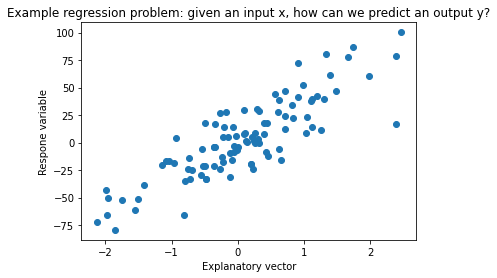

<IPython.core.display.Javascript object>

In [3]:
# make dummy data
X, y = make_regression(n_features=1, noise=20, random_state=10)
plt.scatter(X, y)
plt.xlabel("Explanatory vector")
plt.ylabel("Respone variable")
plt.title(
    "Example regression problem: given an input x, how can we predict an output y?"
)

Without any knowledge of statistics, how may we approach this? If we had a new input, $x=1$, what's a reasonable value that we may assign $y$? How about $x=2$, or $x=-1$? What are the most likely value of $y$ for these inputs?

Hopefully you can see that in order to get a reasonable estimate across any value of $x$, it makes sense to try and draw a straight line through the data. When we get a new input $x$, we can find that value on the $x$ axis, and the use the corresponding $y$ value found along the line.

In other words, our model here is a straight line, or a linear model. What is the formula for a straight line?
$ y = mx + b$. So the goal here, then, is to find such a line that best 'fits' the data. In the model $y = mx + b$, what are the adjustable parameters to change the line? If we ignore the bias term $b$ for the moment (we can center out data around the origin), how might we draw a line?

Text(0.5, 1.0, 'Example linear model')

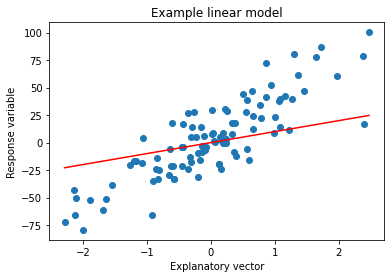

<IPython.core.display.Javascript object>

In [4]:
X = (X - np.mean(X)) / np.std(X)

b = 0  # data is centered at zero
x_model = np.linspace(X.min(), X.max())

m = 10  # play around with this value
y_model = m * x_model + b


plt.plot(x_model, y_model, color="red")
plt.scatter(X, y)
plt.xlabel("Explanatory vector")
plt.ylabel("Response variable")
plt.title("Example linear model")

How might we find the 'best' model (straigh line)? How do we define 'best'? In our test data (X,y), when we fit a particular straight line, it won't ever fit the data perfectly. In other words, we won't ever be able to find a straight line that gives the true value for $y$ for every value of $x$. There will be an error for each prediction.

For example, if we fit a model (straigh line) to our data, and get a prediction of $\hat{y} = 25$ for $x=0$, but the actual value from our data os $y = 30$, we can say there is an absolute error of $y - \hat{y}$ or $30-25=5$. Normally we use a squared error, and so the error becomes $ (y - \hat{y})^2 = 25$.

This is good news! For any particular prediction from our model, we can get a measure of how good that particular prediction is. How can we use this to find the best model, or best fit for a straigh line? Well, we can calculate the total error for that model (by summing up the individual errors). We can then try different models (values for the slope) and choose the model with the lowest error. 

Great! But clearly trying random models won't cut it. Now we have our objective (minimise the total squared error), how can we find the model that gives the minimum error? That's right, we can take the derivative of the error function with respect to the model parameters, which are in this case, the slope. 

Hopefully this has given an intuitive overview of how we migth approach this problem from a geometric approach. In the univariate case (one input x, and one model parameter) we can easily plot the results; in most cases, we will have multiple input variables. Luckily, the same approach can be taken in the multivariate case, with just a few tweaks. 

We can now look at a more formal derivation of how to dolve the least squares problem

In [5]:
# least square estimates
beta_hat = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
beta_hat

array([30.31179391])

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Least squares estimate model fit')

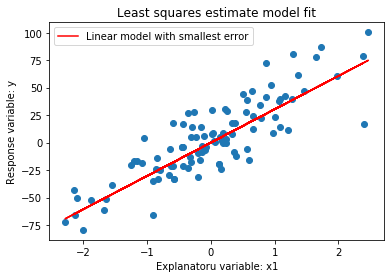

<IPython.core.display.Javascript object>

In [7]:
plt.scatter(X, y)
plt.plot(
    X, np.dot(beta_hat, X.T), color="red", label="Linear model with smallest error"
)
plt.xlabel("Explanatoru variable: x1")
plt.ylabel("Response variable: y")
plt.legend()
plt.title("Least squares estimate model fit")

\begin{equation*}
    \begin{split}
        \frac{\partial RSS}{\partial \beta}error& = \frac{\partial RSS}{\partial \beta}(y-\beta \textbf{X})^T(y-\beta \textbf{X}) \\
        & = \frac{\partial RSS}{\partial \beta}(y^Ty - 2\beta^T\textbf{X}^Ty + \beta^T\textbf{X}^T\textbf{X}\beta) \\
        & = -2\textbf{X}^Ty + 2\textbf{X}^T\textbf{X}\beta = 0
    \end{split}
\end{equation*}

\begin{equation*}   
    \begin{split}
        \textbf{X}^T\textbf{X}\beta = \textbf{X} ^Ty \\
        \implies \beta = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^Ty
    \end{split}
\end{equation*}

\begin{equation*}
    \begin{split}
        \hat{y} = \textbf{X}\hat{\beta} = \textbf{X}(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^Ty \\
        = \textbf{H}y
    \end{split}
\end{equation*}

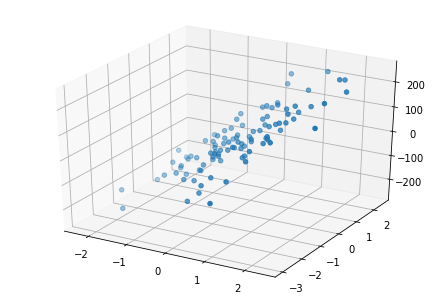

<IPython.core.display.Javascript object>

In [12]:
# For the sake of further analysis, we will now use a 2 dimensional dataset.
X, y = make_regression(n_features=2, noise=20, random_state=10)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], y)
plt.show()

In [27]:
class OLS:
    def __init__(self, lambda_=0):
        self.lambda_ = (
            lambda_  # this will be explained later when we talk about ridge regression
        )
        self.is_fitted = False

    def fit(self, X, y):
        self.X = X
        self.y = y
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.weights = np.dot(
            np.linalg.inv(np.dot(X.T, X) + (self.lambda_ * np.eye(X.shape[1]))),
            np.dot(X.T, y),
        )
        self.is_fitted = True

    def predict(self, X):
        assert self.is_fitted
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return np.dot(self.weights, X.T)

    def plot_line(self):
        assert self.is_fitted
        assert self.X.shape[1] == 1
        pred = self.predict(self.X)
        plt.scatter(self.X, self.y)
        plt.plot(self.X, pred, color="red")

    def train_error(self):
        error = sum((self.predict(self.X) - self.y) ** 2)
        return error

    def sample_betas(self):
        assert self.is_fitted
        var = (1 / self.X.shape[0] - self.X.shape[1] - 1) * sum(
            self.predict(self.X) - self.y
        ) ** 2

        return np.random.normal(self.weights, np.linalg.inv(np.dot(self.X.T, self.X)))


model = OLS(lambda_=10)
model.fit(X, y)


<IPython.core.display.Javascript object>

In [48]:
variance_estimate = (1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(
    (y - model.predict(X)) * 2
)
beta_variance = np.linalg.inv(X.T.dot(X)) * variance_estimate

<IPython.core.display.Javascript object>

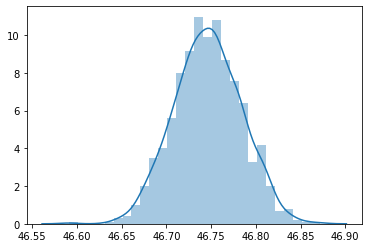

<IPython.core.display.Javascript object>

In [64]:
import seaborn as sns

sns.distplot(
    np.random.multivariate_normal(model.weights[1:], beta_variance, 1000)[:, 1]
)

# Gram Schmidt



# Simple vs Multiple regression

Now that we have explored some geometry of linear models, it is now a good idea to use a real dataset to discover how such models can be used and intepreted.
In simple univariate linear regression, we can interpret the $\hat{\beta}$ coefecient to be the change for 1 unit of our target variable, for 1 unit in our explanatory variable. Can the same logic be applied to multivariate linear regression? Well yes and no! Assume the following multivariate model:

\begin{equation*}
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon
\end{equation*}

Under what circumstances could $\beta_1$ be interpreted in an identical way to thisunviariate model (assuming the same data)?:

\begin{equation*}
y = \beta_0 + \beta_1x_1 + \epsilon
\end{equation*}

(note that we are assuming any affects from $x_2$ are accounted for in the error term $\epsilon $)

We can define a relationship between these parameters as such:

\begin{equation*}
\hat{\beta}_{1_{univariate case}} = \hat{\beta}_{1_{multivariate case}} + \delta_1 \hat{\beta}_{2_{multivariate case}}
\end{equation*}

where $\delta_1$ is the slope coefficient that we would get from performing a simple univariate regression of $x_2$ on $x_1$. Remember what we are doing when we "regress a on b". We are finding the orthogonol projection of $x_2$ onto the column space of $x_1$. In other words, when we say we are regressing $x_2$ on $x_1$, we are finding the residual vector that is this orthogonol vector. 

What is this projection? We have already seen it!

\begin{equation*}
\frac{(x,y)}{(x,x)}
\end{equation*}
...
...
...



In [65]:
# get our real life dataset
from sklearn.datasets import load_boston
import pandas as pd

# generate some correlated data
num_samples = 100
mu = np.array([5.0, 0.0, 10.0])

r = np.array([[3.40, -2.75, -2.00], [-2.75, 5.50, 1.50], [-2.00, 1.50, 1.25]])

data = np.random.multivariate_normal(mu, r, size=num_samples)

X = data[:, :2]

x1 = X[:,0]
x2 = X[:,1]

y = data[:, -1]



<IPython.core.display.Javascript object>

In [66]:
X = np.concatenate(
    [
        np.random.normal(size=100).reshape(-1, 1),
        np.random.normal(size=100).reshape(-1, 1),
    ],
    axis=1,
)
x1 = X[:, 0]
x2 = X[:, 1]

np.corrcoef(x1, x2)

array([[1.       , 0.0387628],
       [0.0387628, 1.       ]])

<IPython.core.display.Javascript object>

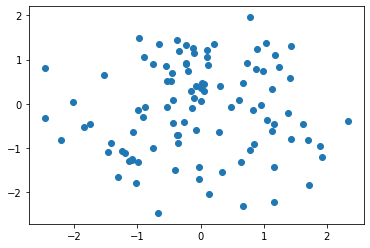

<IPython.core.display.Javascript object>

In [67]:
plt.scatter(x1, x2)

In [68]:
# lets fit both models using our OLS class

# Fit two univariate models on each data point x1 x2
model_uni_0 = OLS()
model_uni_1 = OLS()

model_uni_0.fit(x1.reshape(-1, 1), y)
model_uni_1.fit(x2.reshape(-1, 1), y)

# Fit a multivariate model on both data points x1 x2
model_multi = OLS()
model_multi.fit(X, y)

<IPython.core.display.Javascript object>

In [69]:
def projection_a_on_b(a, b):
    return np.dot(a, b) / np.dot(a, a)


def get_residual_vector(a, b, coef):
    return b - coef * a

<IPython.core.display.Javascript object>

In [70]:
bias = np.ones(X.shape[0])

z0 = bias
coef11 = projection_a_on_b(bias, x1)
z1 = x1 - coef11 * bias

coef12 = projection_a_on_b(z0, x2)
coef22 = projection_a_on_b(z1, x2)
z2 = x2 - coef12 * z0 - coef22 * z1

<IPython.core.display.Javascript object>

In [71]:
print("Estimate for b1", "    ", "Estimate for b2")
print("---" * 20)
print("Weights for univariate regression")
print("---" * 20)
print(model_uni_0.weights[1], model_uni_1.weights[1])
print("---" * 20)
print("Weights for multivariate regression")
print("---" * 20)
print(model_multi.weights[1:])
print("---" * 20)
print("Weights for multivariate regression using Gram Schmidt")
print("---" * 20)
print(projection_a_on_b(z1, y), projection_a_on_b(z2, y))

Estimate for b1      Estimate for b2
------------------------------------------------------------
Weights for univariate regression
------------------------------------------------------------
-0.12441891318887272 -0.11016003730348967
------------------------------------------------------------
Weights for multivariate regression
------------------------------------------------------------
[-0.1203359 -0.1054886]
------------------------------------------------------------
Weights for multivariate regression using Gram Schmidt
------------------------------------------------------------
-0.12441891318887272 -0.1054886013634884


<IPython.core.display.Javascript object>

In [76]:
Q, R = np.linalg.qr(X)

<IPython.core.display.Javascript object>

In [79]:
np.dot(np.linalg.inv(R), np.dot(Q.T, y))

array([-0.33060489, -1.33097009])

<IPython.core.display.Javascript object>

In [82]:
sum((y - np.dot(Q, np.dot(Q.T, y)) * 2))

968.1414903029748

<IPython.core.display.Javascript object>

# Gram-Schmidt Orthogonalisation for Regression

It is often said that having correlated inputs to a regression model can lead to unstable results. This is a very important idea, but one which can be a little difficult to see why is the case.

In a univariate case, what is the least squares estimate of our parameter $\hat{\beta}$?

\begin{equation*}
 \hat{\beta} = \frac{\sum_1^Nx_iy_i}{\sum_1^Nx_i^2}
\end{equation*}

which leads to a residual (error) vector of:

\begin{equation*}
 r_i = y_i - x_i \hat{\beta}
\end{equation*}

Using vector notation, this parameter estimate can be written as such:
\begin{equation*}
 \hat{\beta} = \frac{(x,y)}{(x,x)}
\end{equation*}


...



Here a question. When does this equation get extremely large? In the limit as the denominator of a fraction goes to 0, the answer shoots off to infinity. In other words, in our equation for the parameter estimate, the smaller the residual vector $z_p$, the larger the esimate will be. 

When is the residual vector small? Well when the two vectors $x_1$ and $x_2$ are highly correlated! In other words, the more highly correlated two vectors are, the smaller the residual vector between them will be, and hence the larger the estimate for the beta paramater. 

THis is of course only loolking at two inputs. You can hopefully see how this affect on the residual vector is exacerbated the more residual vectors that we are regressing on (or in other words, the dimensions on our input X). So when our input matrix is highly correlated, it becomes very difficult to see where the...

In [600]:
# are inputs orthogonal?
np.dot(x1, x2)

# no!

269.8338164980422

<IPython.core.display.Javascript object>

In [617]:
# lets walk through one step of the gram schmidt process
X, y = make_regression(n_features=2)
x1 = X[:, 0]
x2 = X[:, 1]

<IPython.core.display.Javascript object>

In [622]:
# regress x1 on bias vector
z1 = x1 - np.mean(x1)


<IPython.core.display.Javascript object>

In [626]:
# regress x2 on z1
beta_1 = np.dot(z1, x2) / np.dot(z1, z1)

z2 = x2 - np.dot(beta_1, z1)


<IPython.core.display.Javascript object>

In [628]:
# we can now find a particular beta by regression y on that residual vector

beta_2 = np.dot(z2, y) / np.dot(z2, z2)


<IPython.core.display.Javascript object>

In [632]:
2np.linalg.qr(X)[0]

array([[-0.00229761,  0.11375298],
       [-0.15504685, -0.02275855],
       [ 0.17952053,  0.03015269],
       [ 0.08829281,  0.1131944 ],
       [-0.18292553,  0.07598815],
       [-0.05419831, -0.13678818],
       [ 0.12270547, -0.04565162],
       [ 0.0666077 ,  0.12514536],
       [ 0.12576041,  0.07802047],
       [-0.14180264, -0.08306831],
       [-0.11740692,  0.04098348],
       [-0.14589552,  0.23063147],
       [ 0.00147172, -0.02047355],
       [ 0.18790707, -0.10443763],
       [ 0.22954063, -0.03096558],
       [-0.0381227 ,  0.10940433],
       [-0.02466032, -0.1850471 ],
       [ 0.08990829,  0.02884958],
       [ 0.00488107,  0.06562306],
       [ 0.03610896, -0.09426014],
       [-0.16998999,  0.00127118],
       [-0.08044803,  0.1985494 ],
       [-0.03622665, -0.02337432],
       [-0.1125704 , -0.07335979],
       [ 0.00561485,  0.10704321],
       [ 0.17752758,  0.06696616],
       [-0.02237978,  0.02064419],
       [-0.0498581 , -0.05594922],
       [ 0.04496748,

<IPython.core.display.Javascript object>

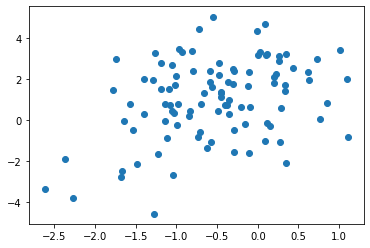

-7.105427357601002e-15

<IPython.core.display.Javascript object>

In [577]:
2  # lets build a functuon that regresses x on y to produce residual vector z


def regress_a_on_b(a, b):
    coef = np.dot(a, b) / np.dot(a, a)
    resid_vec = b - (coef * a)
    return resid_vec, coef


plt.scatter(regress_a_on_b(x2, x1)[0], x2)
plt.show()

np.dot(regress_a_on_b(x2, x1)[0], x2)

In [601]:
# lets go back to our univariate case and compare the gram schmidt procedure to our least squares fit

X, y = make_regression(n_features=1, noise=20, random_state=10)


def gram_schmidt(X):
    p = X.shape[1]
    n = X.shape[0]
    z = np.zeros([n, p + 1])

    # initialise
    z[:, 0] = 1

    for j in range(p):
        xj = X[:, j]

        coef_vec = np.zeros(j + 1)

        for l in range(j + 1):
            zl = z[:, l]
            coef = regr_a_on_b(xj, zl)[1]
            coef_vec[l] = coef

        zj = xj - np.dot(coef_vec, z[:, : j + 1].T)
        z[:, j + 1] = zj
    return z


resid_vec = gram_schmidt(X)
beta_hat_1 = regr_a_on_b(y, resid_vec[:, 1])[1]

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Example linear model')

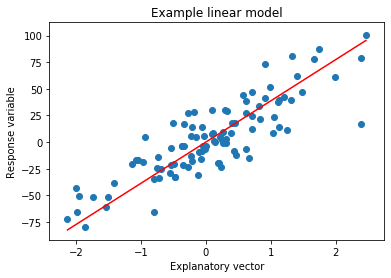

<IPython.core.display.Javascript object>

In [602]:
b = 0  # data is centered at zero
x_model = np.linspace(X.min(), X.max())

m = beta_hat_1  # play around with this value
y_model = -m * x_model + b


plt.plot(x_model, y_model, color="red")
plt.scatter(X, y)
plt.xlabel("Explanatory vector")
plt.ylabel("Response variable")
plt.title("Example linear model")